<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.3 Unconstrained Optimization**
* Necessary and sufficient conditions of local minimizers
* Convexity and global minimizers
* Gradient descent

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# **Necessary and sufficient conditions of local minimizers**

We are interested in unconstrained optimization of the form:

$\underset{x\in R^d}{min}f(x)$ where $f: R^d → R$

The point $x^*$ is a global minimizer of $f$ over $R^d$ if
$f(x) ≥ f(x^*)$ for all x in $R^d$

The point $x^*$ is a local minimizer of $f$ over $R^d$ if
$f(x) ≥ f(x^*), \forall x \in B_δ(x^*)\backslash{{x^*}}$

For a strict inequlity, we say $x^*$ is a strict local minimizer.

Descent direction: A vector v is a descent direction for $f$ at $x_0$ if there is a $α^*>0$ such that $f(x_0+αv)<f(x_0), ∀a∈(0,a^*)$

We can use gradient descent to find the local minimizer of a function.

In [15]:
def function(x):
    return x**2 + 4*np.sin(2*x)  # Example function: f(x) = x^2 + 4*sin(2x)
def derivative(x):
    return 2*x + 8*np.cos(2*x)   # Derivative of the function: f'(x)

The gradient descent function starts at *start_x* and computes the gradient of the function at each x in the direction opposite to the gradient (at the learning rate). This continues until $\Delta$x is smaller than *tolerance* or *max_iter* is reached. It returns the local minimizer and the trajectory of the descent steps.

In [16]:
def gradient_descent(derivative, start_x, learning_rate=0.01, tolerance=1e-6, max_iter=1000):
    x = start_x
    iteration = 0
    steps = [x]

    while iteration < max_iter:
        grad = derivative(x)
        new_x = x - learning_rate * grad

        if abs(new_x - x) < tolerance:
            break

        x = new_x
        steps.append(x)
        iteration += 1

    return x, steps

In [19]:
start_x = 3
learning_rate = 0.01
local_min, steps = gradient_descent(derivative, start_x, learning_rate)

print(f"Local minimum occurs at x = {local_min}, y = {function(local_min)}")

Local minimum occurs at x = 2.0824212672360494, y = 0.9212607498646084


We plot f(x) and highlight the local minimum.

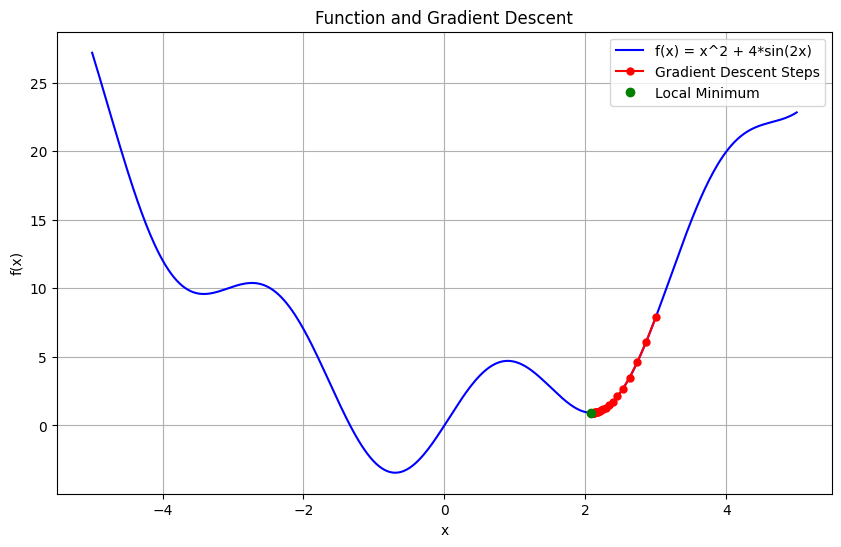

In [20]:
x_vals = np.linspace(-5, 5, 500)
y_vals = function(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 + 4*sin(2x)', color='blue')
step_x_vals = np.array(steps)
step_y_vals = function(step_x_vals)
plt.plot(step_x_vals, step_y_vals, 'ro-', label='Gradient Descent Steps', markersize=5)
plt.plot(local_min, function(local_min), 'go', label='Local Minimum')
plt.title('Function and Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()